## CONFIDENCE INTERVALS

**EXERCISE 1.** What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [1]:
# Import pandas, numpy, scip.stats
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Sample size
n = 130 
# The mean of body temperatures
xbar = 98.25
#The std of body temperatures
s = 0.73

sem = s/np.sqrt(n)   # sem or sigma_x_bar : std of imaginary graph (std for sampling dist of sample mean)

# A confidence interval has the form: estimate ± margin of error
# 99% Confidence Interval (z_0.01/2 = 2.576, from z table) 
# Sample size is big, we can use z-score

moe = 2.576*sem
upper_lim = xbar + moe
low_lim = xbar - moe

ci_z = [low_lim, upper_lim]

ci_z


[98.08507099358535, 98.41492900641465]

In [3]:
#check this using stat library

ci_z_stat = stats.norm.interval(0.99, xbar, sem)
ci_z_stat



(98.08508192246582, 98.41491807753418)

In [4]:
#we can do this using t-table (in general we use this)
ci_t_stat = stats.t.interval(0.99, 
                        n-1, 
                        xbar, 
                        scale=sem)
ci_t_stat 


(98.08260738705933, 98.41739261294067)

**EXERCISE 2.** The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [5]:
# Sample size
n_patients = 500
# The mean of number of days required
xbar_days_required = 5.4 
#The std of number of days required
s_days_required = 3.1

sem_days_required = s_days_required/np.sqrt(n_patients)   # sem or sigma_x_bar

# A confidence interval has the form: estimate ± margin of error
# 95% Confidence Interval (z_0.05/2 = 1.96, from z table)

moe_days_required = 1.96*sem_days_required
upper_lim = xbar_days_required + moe_days_required
low_lim = xbar_days_required - moe_days_required

ci_z_days_required = [low_lim, upper_lim]

ci_z_days_required


[5.128273019374226, 5.671726980625775]

In [6]:
#check this using stat library

ci_z_days_required_stat = stats.norm.interval(0.95, xbar_days_required, sem_days_required)
ci_z_days_required_stat

(5.12827801242126, 5.67172198757874)

In [7]:
#Using t-table (in general we use this)
ci_t_days_required_stat = stats.t.interval(0.95, 
                        n_patients-1, 
                        xbar_days_required, 
                        scale=sem_days_required)
ci_t_days_required_stat 

(5.127617354510309, 5.672382645489692)

## HYPOTHESIS TESTING

**EXERCISE 3.** The hourly wages in a particular industry are normally distributed with mean 13.20 and standard deviation 2.50. A company in this industry employs 40 workers, paying them an average of 12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)


In [8]:
#do it manually (don't have explicit data), we can use z-score (n = 40>30), but this is generally theoritical

x_bar = 12.20 # sample mean 
n = 40 # number of samples
sigma =  2.50 # sd of population
mu = 13.20 # Population mean 

# H_0: mu = 13.20
# H_1: mu < 13.20 # Since our sample has xbar = 12.20, also [area under left tail (one sided)]

# Calculate the test statistic
z = (x_bar - mu)/(sigma/np.sqrt(n)) 
# we get z = -2.5298221281347035
# Calculate the p-value
p_value = stats.norm.cdf(z) #gives cumilative probability upto z and left of it

print(f"statistic: {z}, pvalue= {p_value}")

alpha = 0.01

if p_value<alpha:
    print(f'At {alpha} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.')
else:
    print(f'At {alpha} level of significance, we fail to reject the null hypothesis.')

statistic: -2.5298221281347035, pvalue= 0.005706018193000826
At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


In [9]:
# repeat it with t-test scroe (in general we use this)

t = (x_bar - mu)/(sigma/np.sqrt(n))
p_value = stats.t.cdf(t, n-1) #gives cumilative probability upto t and left of it

print(f"statistic: {z}, pvalue= {p_value}")

alpha = 0.01

if p_value<alpha:
    print(f'At {alpha} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.')
else:
    print(f'At {alpha} level of significance, we fail to reject the null hypothesis.')

statistic: -2.5298221281347035, pvalue= 0.0077816812266594355
At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


**CHECK:** statistic: -2.5298221281347035, pvalue= 0.005706018193000826

**EXERCISE 4.** Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

[Link for two type of soils](https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit#gid=0)


In [10]:
#Import soil dataset
soil = pd.read_csv("soil - Sheet1.csv")
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [11]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [12]:
# Use Independent Samples T Test
#H0: mu1 = mu2
#H1: mu1 != mu2

In [13]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.(equal_var = False)
#The large p-value suggests that the populations have equal variances.(equal_var = True) 
leveneTest = stats.levene(soil.Soil1.dropna(), soil.Soil2) # drop nulls in Soil1 otherwise test is not working
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [14]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(soil.Soil1.dropna(), soil.Soil2, equal_var = True) # p is large use True
print(indTest)

# Decision
alpha = 0.01

if indTest.pvalue < alpha:
    print(f"Reject the null. At the {alpha} significance level, we have sufficient evidence to indicate that the soils appear to differ with respect to average shear strength. ")
else:
    print("Fail to reject the null.")

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)
Reject the null. At the 0.01 significance level, we have sufficient evidence to indicate that the soils appear to differ with respect to average shear strength. 


**CHECK:** statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06


**EXERCISE 5.** The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). Link World Bank Edstats. [2015 PISA Test Dataset](https://docs.google.com/spreadsheets/d/14rVnIUfEm3CuK9bSvS5253RHWzQhXOuNc0I-cCkgpR8/edit#gid=0)

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.


In [15]:
#Import PISA test dataset
PISA_Test = pd.read_csv("2015 PISA Test - Sheet1.csv")
PISA_Test.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [16]:
PISA_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [17]:
PISA_Test.groupby("Continent_Code").describe()

internet_users_per_100                                   \
                                count       mean        std        min   
Continent_Code                                                           
AF                                2.0  43.359918   7.297226  38.200000   
AS                               17.0  68.455613  21.086060  21.976068   
EU                               37.0  77.274888  12.425773  53.744979   
OC                                2.0  86.391704   2.589686  84.560519   
SA                                7.0  60.180494   9.772455  40.900000   

                                                            Math              \
                      25%        50%        75%        max count        mean   
Continent_Code                                                                 
AF              40.779959  43.359918  45.939877  48.519836   2.0  363.212100   
AS              50.300000  74.000000  84.948353  92.884826  17.0  466.216647   
EU              68.632900  76.184000  87.479056  98.200000  37.0  477.981449   
OC              85.476112  86.391704  87.307296  88.222889   2.0  494.559750   
SA              57.116462  64.289000  66.321532  69.198471   7.0  402.887700   

                ...     Reading           Science                         \
                ...         75%       max   count        mean        std   
Continent_Code  ...                                                        
AF              ...  358.256450  361.0555     2.0  381.074250   7.536556   
AS              ...  508.690500  535.1002    17.0  467.945847  56.671371   
EU              ...  499.814600  526.4247    37.0  478.299381  34.450616   
OC              ...  507.678175  509.2707     2.0  511.648700   2.340241   
SA              ...  431.922700  458.5709     7.0  421.747186  18.470319   

                                                                       
                     min         25%        50%         75%       max  
Continent_Code                                                         
AF              375.7451  378.409675  381.07425  383.738825  386.4034  
AS              386.4854  417.611200  456.48360  523.277400  555.5747  
EU              383.6824  460.774900  490.22500  501.936900  534.1937  
OC              509.9939  510.821300  511.64870  512.476100  513.3035  
SA              396.6836  408.205450  424.59050  433.794600  446.9561  

[5 rows x 32 columns]

In [18]:
df_EU =PISA_Test[PISA_Test["Continent_Code"]=="EU"]
df_EU.sample(10)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
44,MDA,EU,63.306625,419.6635,416.2293,427.9978
60,SVK,EU,77.634700,475.2301,452.5143,460.7749
47,MLT,EU,76.184000,478.6448,446.6661,464.7819
51,NOR,EU,96.810300,501.7298,513.1912,498.4811
9,CHE,EU,87.479056,521.2506,492.1982,505.5058
20,ESP,EU,78.689600,485.8432,495.5764,492.7861
54,POL,EU,67.997000,504.4693,505.6971,501.4353
34,ITA,EU,58.141735,489.7287,484.7580,480.5468
17,DNK,EU,96.330500,511.0876,499.8146,501.9369
41,LUX,EU,97.334100,485.7706,481.4391,482.8064


In [19]:
df_EU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 66
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            37 non-null     object 
 1   Continent_Code          37 non-null     object 
 2   internet_users_per_100  37 non-null     float64
 3   Math                    37 non-null     float64
 4   Reading                 37 non-null     float64
 5   Science                 37 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.0+ KB


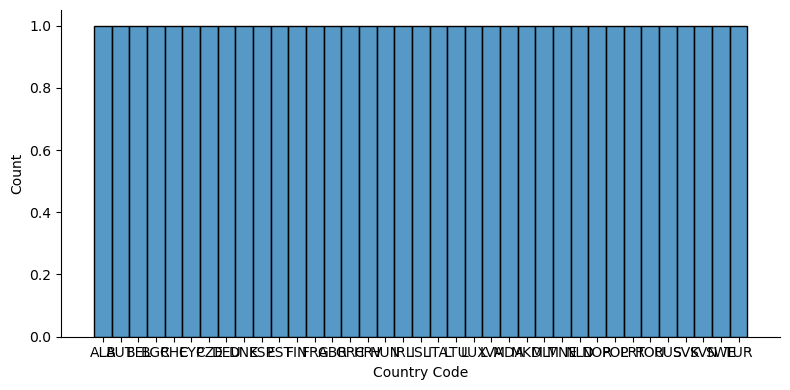

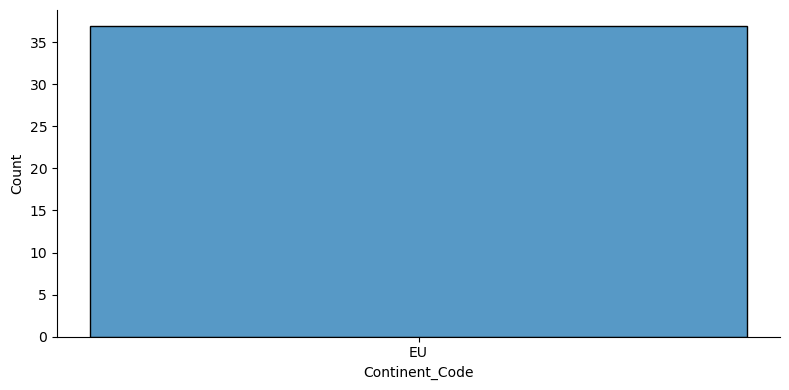

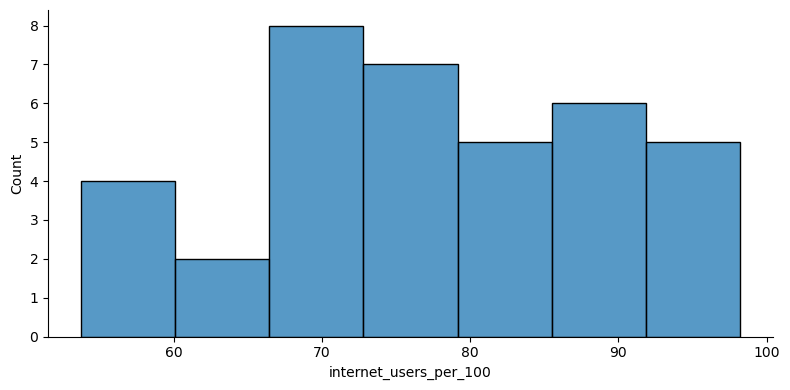

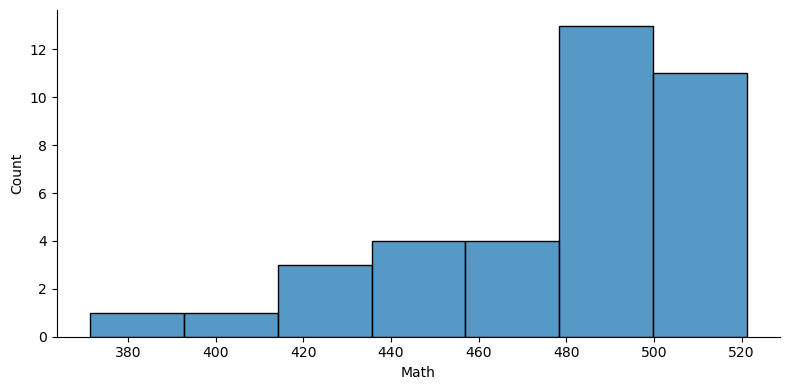

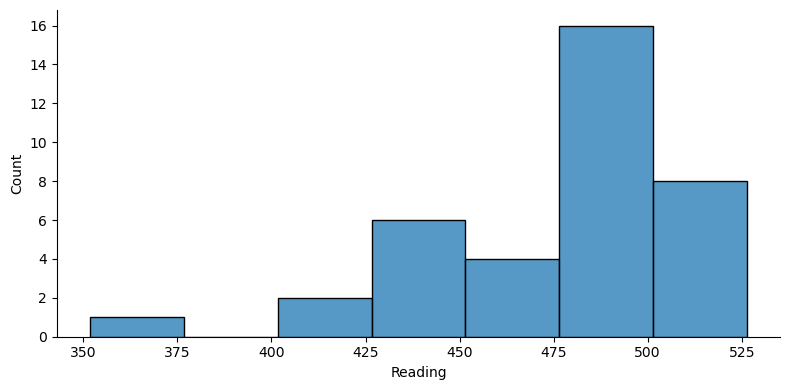

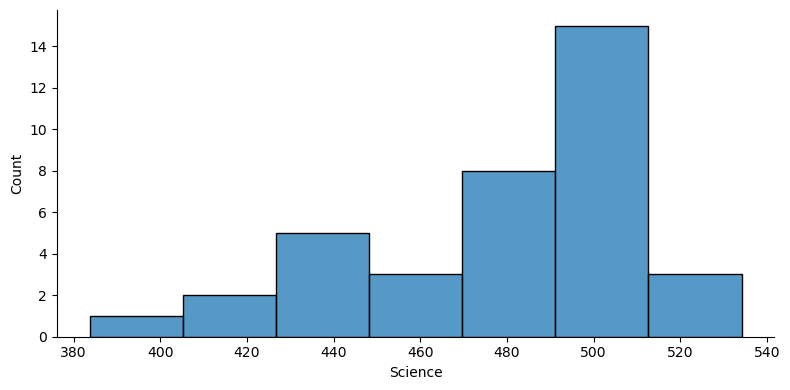

In [20]:
for col in df_EU.columns:
  sns.displot(x=col, height = 4, aspect = 2, data=df_EU)

In [21]:
df_AS =PISA_Test[PISA_Test["Continent_Code"]=="AS"]
df_AS.sample(10)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
59,SGP,AS,79.012957,564.1897,535.1002,555.5747
56,QAT,AS,92.884826,402.4007,401.8874,417.6112
43,MAC,AS,77.600132,543.8078,508.6905,528.5496
37,KAZ,AS,72.900000,459.8160,427.1410,456.4836
30,IDN,AS,21.976068,386.1096,397.2595,403.0997
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
33,ISR,AS,77.352090,469.6695,478.9606,466.5528
63,THA,AS,39.316127,415.4638,409.1301,421.3373
38,KOR,AS,89.648631,524.1062,517.4367,515.8099
35,JOR,AS,60.114383,380.2590,408.1022,408.6691


In [22]:
df_AS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            17 non-null     object 
 1   Continent_Code          17 non-null     object 
 2   internet_users_per_100  17 non-null     float64
 3   Math                    17 non-null     float64
 4   Reading                 17 non-null     float64
 5   Science                 17 non-null     float64
dtypes: float64(4), object(2)
memory usage: 952.0+ bytes


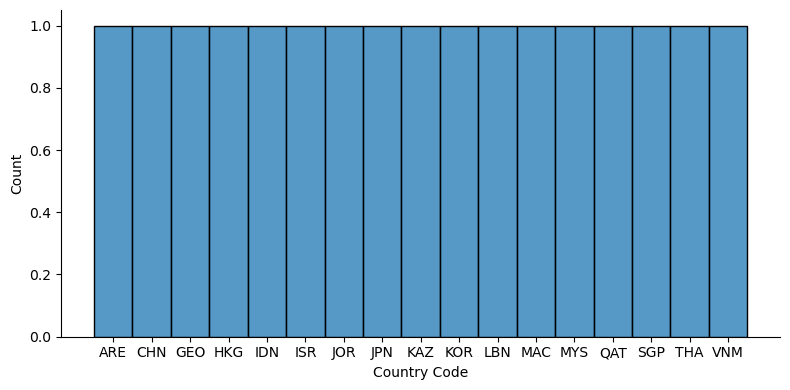

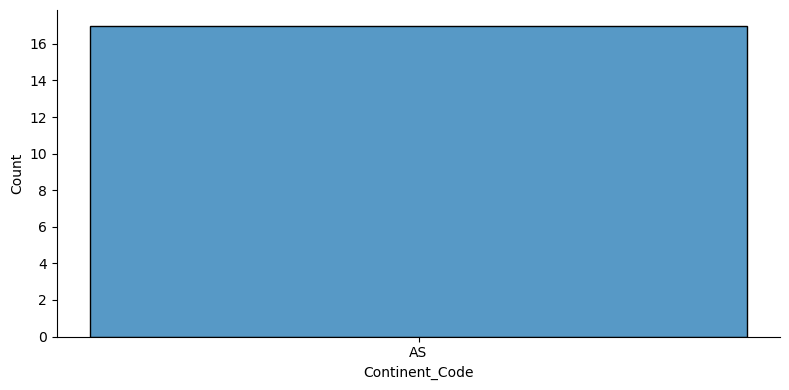

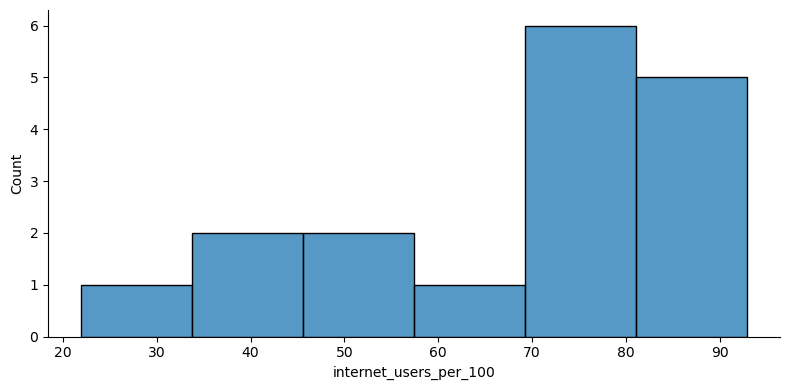

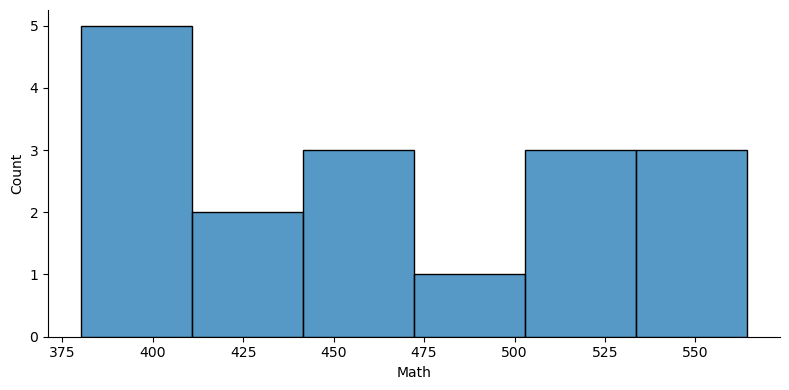

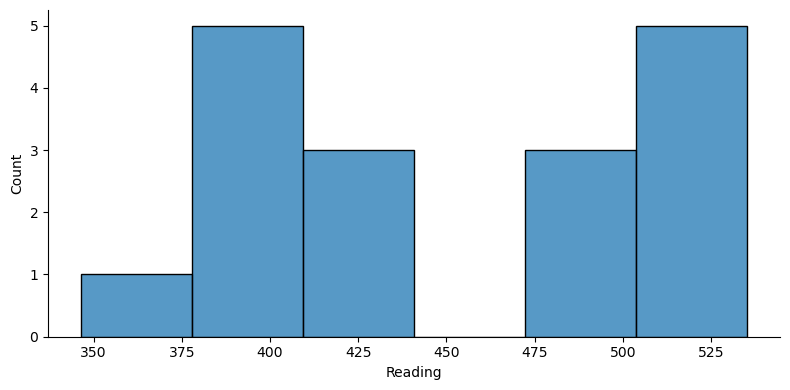

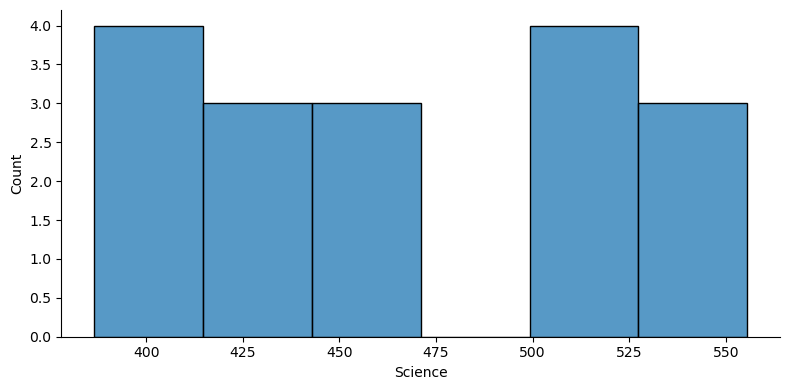

In [23]:
for col in df_AS.columns:
  sns.displot(x=col, height = 4, aspect = 2, data=df_AS)

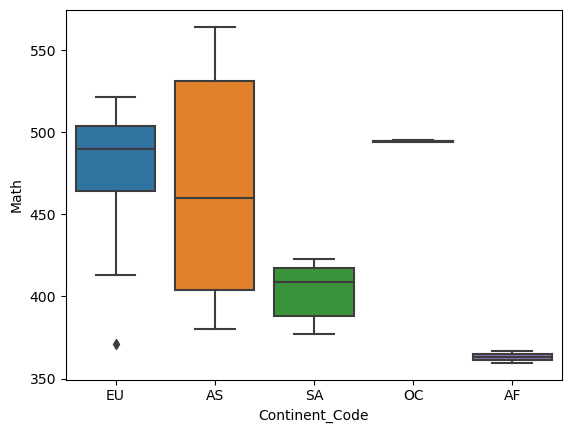

In [24]:
sns.boxplot(data=PISA_Test, x = "Continent_Code",y = "Math");

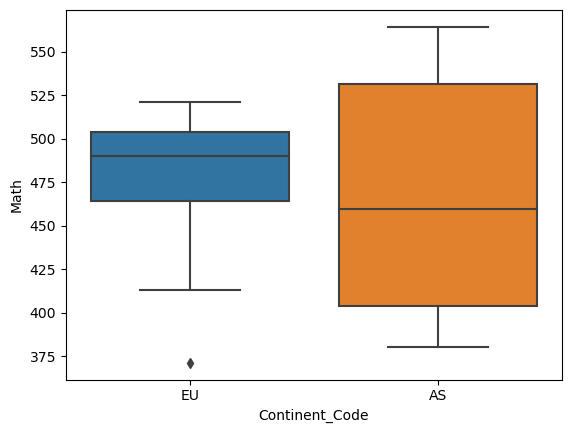

In [25]:
sns.boxplot(data=PISA_Test, x = PISA_Test[(PISA_Test["Continent_Code"] == "EU") | (PISA_Test["Continent_Code"] == "AS")]["Continent_Code"],y = PISA_Test[(PISA_Test["Continent_Code"] == "EU") | (PISA_Test["Continent_Code"] == "AS")]["Math"]);

In [26]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [27]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(df_EU.Math,df_AS.Math, equal_var = True)
print(indTest)

# Decision
alpha = 0.05 #signifigance level not given use 5% 

if indTest.pvalue < alpha:
    print(f"Reject the null. At the {alpha} significance level, we have sufficient evidence to indicate that there is difference (on the average) for the math scores among European (EU) and Asian (AS) countries . ")
else:
    print("Fail to reject the null.")

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)
Fail to reject the null.


**CHECK:** statistic=0.870055317967983, pvalue=0.38826888111307345